In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock = pd.read_csv('D://data/dataset/stock.csv')
stock.head()

,Unnamed: 0,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,0,000001.SH,20180813,2785.8720,2769.0166,2789.7983,2742.5599,2795.3099,-9.4379,-0.3376,127532241.0,129460540.4
1,1,000001.SH,20180814,2780.9646,2780.7357,2789.4437,2766.5693,2785.8720,-4.9074,-0.1762,109571077.0,112465397.0
2,2,000001.SH,20180815,2723.2576,2777.2493,2777.7032,2721.2404,2780.9646,-57.7070,-2.0751,116161787.0,118707674.1
3,3,000001.SH,20180816,2705.1917,2691.4260,2732.9489,2672.7407,2723.2576,-18.0659,-0.6634,120277878.0,117580995.0
4,4,000001.SH,20180817,2668.9660,2723.8871,2730.3326,2665.5918,2705.1917,-36.2257,-1.3391,112445294.0,115499397.0


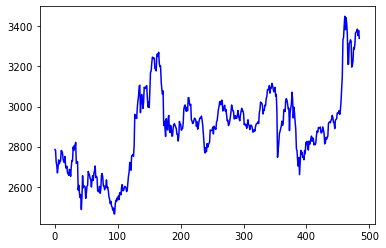

In [3]:
fig1 = plt.figure()
plt.plot(stock['close'],color = 'blue')
plt.show()

# 隐马尔可夫模型

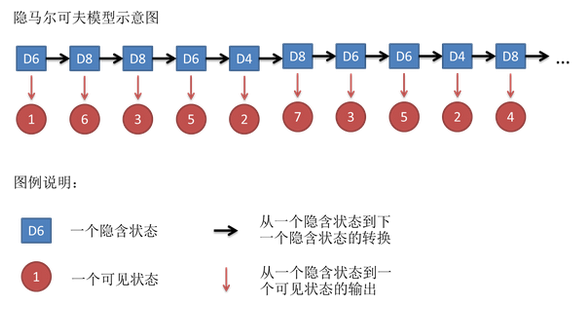

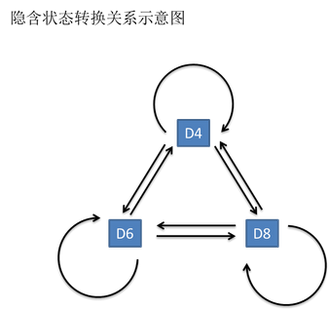

1. Notation

        S={s1,s2,…,sN,} 表示所有可能状态的集合（《统计学习方法》使用Q来表示），
        N 表示可能的状态数，
        V={v1,v2,…,vM,} 表示可能的观测的集合，
        M 表示可能的观测数，
        I 表示长度为T的状态序列，O是对应的观测序列，
        A 表示状态转移概率矩阵，
        B 表示观测概率矩阵，
        Pi 表示初始状态概率向量，
        Lambda ＝（A, B, Pi）表示隐马尔可夫模型的参数模型。

2. 维特比算法的python实现
     
       通常来说隐马尔可夫模型(以下简称HMM)有3个基本问题：概率计算问题，学习问题，预测问题（也称解码问题）。第一个问题对应前向算法和后向算法；二，三一般使用Baum-Welch算法，维特比Viterbi算法来解决。
    
       大部分时候前向算法和后向算法都是为Baum-Welch算法服务的，而维特比Viterbi算法是单独存在的，所以我们先讲维特比（以下简称Viterbi）算法。

代码实现

    hmmlearn的API继承了sklearn一贯的简洁风格，初始化模型时只需要提供几个简单的参数就可以了，下面的n_components是状态序列中的状态种类数量，n_iter是迭代次数：

# 1. hmmlearn概述

　　　　hmmlearn安装很简单，"pip install hmmlearn"即可完成。

　　　　hmmlearn实现了三种HMM模型类，按照观测状态是连续状态还是离散状态，可以分为两类。GaussianHMM和GMMHMM是连续观测状态的HMM模型，而MultinomialHMM是离散观测状态的模型，也是我们在HMM原理系列篇里面使用的模型。

　　　　对于MultinomialHMM的模型，使用比较简单，"startprob_"参数对应我们的隐藏状态初始分布Π, "transmat_"对应我们的状态转移矩阵A, "emissionprob_"对应我们的观测状态概率矩阵B。

　　　　对于连续观测状态的HMM模型，GaussianHMM类假设观测状态符合高斯分布，而GMMHMM类则假设观测状态符合混合高斯分布。一般情况下我们使用GaussianHMM即高斯分布的观测状态即可。以下对于连续观测状态的HMM模型，我们只讨论GaussianHMM类。

　　　　在GaussianHMM类中，"startprob_"参数对应我们的隐藏状态初始分布Π, "transmat_"对应我们的状态转移矩阵A, 比较特殊的是观测状态概率的表示方法，此时由于观测状态是连续值，我们无法像MultinomialHMM一样直接给出矩阵B。而是采用给出各个隐藏状态对应的观测状态高斯分布的概率密度函数的参数。

　　　　如果观测序列是一维的，则观测状态的概率密度函数是一维的普通高斯分布。如果观测序列是N维的，则隐藏状态对应的观测状态的概率密度函数是N维高斯分布。高斯分布的概率密度函数参数可以用μ表示高斯分布的期望向量，Σ表示高斯分布的协方差矩阵。在GaussianHMM类中，“means”用来表示各个隐藏状态对应的高斯分布期望向量μ形成的矩阵，而“covars”用来表示各个隐藏状态对应的高斯分布协方差矩阵Σ形成的三维张量。

# 问题一：概率计算（已知参数，求解隐层和观测序列的概率）

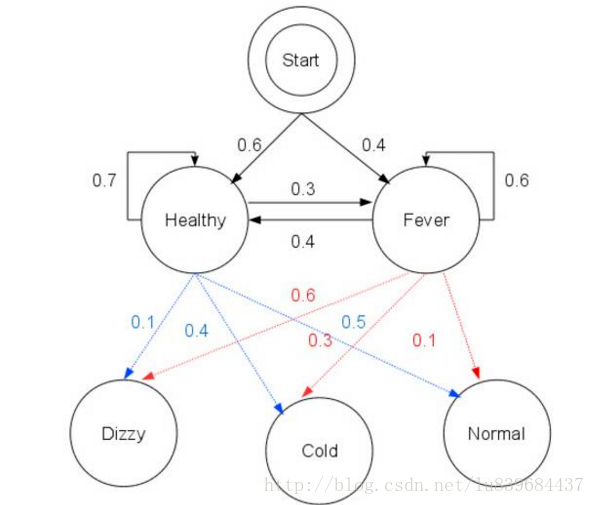

## 离散型 

In [4]:
states = ["box 1", "box 2", "box3"]
n_states = len(states)

observations = ["red", "white"]
n_observations = len(observations)

start_probability = np.array([0.2, 0.4, 0.4])

transition_probability = np.array([
  [0.5, 0.2, 0.3],
  [0.3, 0.5, 0.2],
  [0.2, 0.3, 0.5]
])

emission_probability = np.array([
  [0.5, 0.5],
  [0.4, 0.6],
  [0.7, 0.3]
])

In [5]:
# 导入参数
from hmmlearn import hmm

model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_=start_probability
model.transmat_=transition_probability
model.emissionprob_=emission_probability

In [6]:
seen = np.array([[0,1,0]]).T
logprob, box = model.decode(seen, algorithm="viterbi")

seen_num = np.array([0, 1, 0]).T
print("The ball picked:", ", ".join(map(lambda x: observations[x], seen_num)))
print("The hidden box:", ", ".join(map(lambda x: states[x], box)))

The ball picked: red, white, red
The hidden box: box3, box3, box3


In [7]:
print('初始的状态：',model.startprob_)
print('\n 转移矩阵： \n',model.transmat_)
print('\n 观测矩阵：\n',model.emissionprob_)
print('\n 得分', model.score(seen))

初始的状态： [0.2 0.4 0.4]

 转移矩阵： 
 [[0.5 0.2 0.3]
 [0.3 0.5 0.2]
 [0.2 0.3 0.5]]

 观测矩阵：
 [[0.5 0.5]
 [0.4 0.6]
 [0.7 0.3]]

 得分 -2.038545309915233


## 连续型 

In [120]:
change = np.array(stock['change'])
close = np.array(stock['close'])

change = np.array(change)
close = np.array(close)

In [121]:
states = ["up", "down", "balance"]
n_states = len(states)

observations = close
n_observations = len(observations)

start_probability = np.array([0.2, 0.4, 0.4])

transition_probability = np.array([
  [0.5, 0.2, 0.3],
  [0.3, 0.5, 0.2],
  [0.2, 0.3, 0.5]
])

means = np.array([
    [2600],
    [3000],
    [3200]
])
covars = np.array([
    [5000],
    [5000],
    [2000],
])

In [122]:
# 导入参数
from hmmlearn import hmm

model = hmm.GaussianHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability

model.means_ = means
model.covars_ = covars

In [123]:
print(model.decode(close[:20].reshape(-1, 1), algorithm="viterbi"))
logprob, box = model.decode(close[:20].reshape(-1, 1), algorithm="viterbi")

print(close[:20])
print("The hidden box:", ", ".join(map(lambda x: states[x], box)))

(-154.93469839782293, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
[2785.872  2780.9646 2723.2576 2705.1917 2668.966  2698.4658 2733.8264
 2714.6082 2724.6244 2729.4308 2780.899  2777.9808 2769.2947 2737.7367
 2725.2499 2720.7344 2750.5804 2704.3368 2691.5929 2702.3007]
The hidden box: up, up, up, up, up, up, up, up, up, up, up, up, up, up, up, up, up, up, up, up


In [124]:
print('初始的状态：',model.startprob_)
print('\n 转移矩阵： \n',model.transmat_)
print('\n 观测函数的均值：\n',model.means_ , '\n 观测函数的方差： \n',model.covars_)
print('\n 得分',model.score(close.reshape(-1, 1)))

初始的状态： [0.2 0.4 0.4]

 转移矩阵： 
 [[0.5 0.2 0.3]
 [0.3 0.5 0.2]
 [0.2 0.3 0.5]]

 观测函数的均值：
 [[2600]
 [3000]
 [3200]] 
 观测函数的方差： 
 [[[5000]]

 [[5000]]

 [[2000]]]

 得分 -3400.4730608475024


In [137]:
hidden_states = np.array(model.decode(close.reshape(-1, 1), algorithm="viterbi")[1])
model.decode(close.reshape(-1, 1), algorithm="viterbi")

(-3411.232640217859,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 

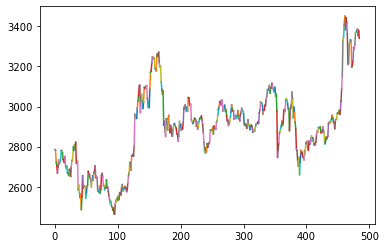

In [138]:
import numpy as np
dates= []
for i in range(485):
    dates.append(i)
dates= np.array(dates)

for j in range(len(close)-1):
    for i in range(model.n_components):
        if hidden_states[j] == i:
            plt.plot([dates[j],dates[j+1]],[close[j],close[j+1]])

plt.show()

# 问题二：学习问题（已知观测序列， 求解隐层和模型参数）

## 离散型 

In [60]:
change = np.array(stock['change'])
close = np.array(stock['close'])

k = 5 #设置离散之后的数据段为5

#等宽离散 ， 做离散型
change = pd.cut(change,k,labels = range(k))
close = pd.cut(close,k,labels = range(k))
type(change),change

change = np.array(change)
close = np.array(close)

In [61]:
# 离散型
from hmmlearn.hmm import MultinomialHMM

model = MultinomialHMM(n_components=5 ,n_iter=2000)
model.fit(close.reshape(-1, 1))#训练模型————学习问题
hidden_states = model.predict(close.reshape(-1,1))#估计状态序列————解码问题

In [62]:
print('初始的状态：',model.startprob_)
print('\n 转移矩阵： \n',model.transmat_)
print('\n 观测矩阵：\n',model.emissionprob_)
print('\n 得分',model.score(close.reshape(-1, 1)))

初始的状态： [0.00000000e+00 1.00000000e+00 0.00000000e+00 6.05138543e-92
 0.00000000e+00]

 转移矩阵： 
 [[9.58779824e-001 1.91923608e-043 8.66334158e-004 1.17843093e-002
  2.85695327e-002]
 [8.39245741e-048 9.19474254e-001 0.00000000e+000 8.05257462e-002
  1.43989488e-059]
 [9.13019919e-015 0.00000000e+000 9.51312336e-001 1.85064322e-168
  4.86876641e-002]
 [7.89033380e-002 5.49533716e-002 5.26514602e-173 8.66143290e-001
  2.40095651e-012]
 [4.56021736e-005 6.13187077e-045 9.83127576e-002 1.14777907e-001
  7.86863733e-001]]

 观测矩阵：
 [[1.90417665e-229 1.47296913e-026 1.00000000e+000 9.91606311e-012
  1.19829600e-284]
 [9.55763824e-001 4.42361760e-002 4.72834710e-264 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 5.87897240e-182 2.66679289e-026 6.25851842e-001
  3.74148158e-001]
 [5.97623035e-116 1.00000000e+000 1.49739944e-016 5.97726690e-054
  0.00000000e+000]
 [1.04168225e-274 2.19147332e-014 8.25080928e-001 1.74919072e-001
  4.15117937e-159]]

 得分 -204.87175265782653


## 连续型 

In [64]:
change = np.array(stock['change'])
close = np.array(stock['close'])

change = np.array(change)
close = np.array(close)

In [65]:
# 连续性
from hmmlearn.hmm import GaussianHMM

model = GaussianHMM(n_components=5 ,n_iter=2000)
model.fit(close.reshape(-1, 1))#训练模型————学习问题
hidden_states = model.predict(close.reshape(-1,1))#估计状态序列————解码问题

In [70]:
print('初始的状态：',model.startprob_)
print('\n 转移矩阵： \n',model.transmat_)
print('\n 观测函数的均值：\n',model.means_, '\n 观测函数的方差： \n', model.covars_)
print('\n 得分',model.score(close.reshape(-1, 1)))

初始的状态： [9.36076011e-106 1.39954925e-120 1.00000000e+000 3.94494940e-178
 5.78159656e-071]

 转移矩阵： 
 [[9.24198280e-001 8.84435293e-046 2.35119977e-002 5.22897221e-002
  1.59176308e-083]
 [1.31371199e-002 9.45546098e-001 6.99401576e-005 4.12468417e-002
  2.54608556e-065]
 [4.36566791e-002 7.11718607e-057 9.36741849e-001 8.94472412e-003
  1.06567475e-002]
 [4.39423437e-002 4.71714158e-002 9.89607475e-003 8.98990166e-001
  2.62653961e-063]
 [7.32622690e-095 2.81141632e-125 1.25830989e-002 8.06026318e-088
  9.87416901e-001]]

 观测函数的均值：
 [[2903.68125693]
 [3208.70671416]
 [2764.91989166]
 [2990.54332446]
 [2588.20729074]] 
 观测函数的方差： 
 [[[  675.43315849]]

 [[13559.37112531]]

 [[ 2815.63956352]]

 [[ 1136.51615359]]

 [[ 2760.65775575]]]

 得分 -2643.6414126671416


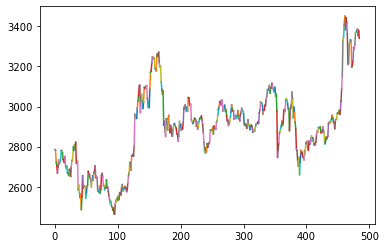

In [71]:
import numpy as np
dates= []
for i in range(485):
    dates.append(i)
dates= np.array(dates)

for j in range(len(close)-1):
    for i in range(model.n_components):
        if hidden_states[j] == i:
            plt.plot([dates[j],dates[j+1]],[close[j],close[j+1]])

plt.show()

# 问题三：解码问题、预测问题

In [139]:
# 已在问题一、二解决

# 多个特征

In [140]:
change = np.array(stock['change'])
close = np.array(stock['close'])

In [141]:
k = 20 #设置离散之后的数据段为10
#等宽离散
change = pd.cut(change,k,labels = range(k))
close = pd.cut(close,k,labels = range(k))
type(change),change
X = pd.DataFrame([change, close])
X.head()
X = np.array(X)

In [142]:
model = GaussianHMM(n_components=20,n_iter=1000)
model.fit(X)#训练模型————学习问题
hidden_states = model.predict(X)#估计状态序列————解码问题

In [112]:
hidden_states

array([ 5,  5,  1,  1,  1,  1,  1,  1,  1,  1,  8,  5,  5,  1,  1,  1,  1,
       17,  7,  7,  7,  7,  7,  7,  7,  7,  7,  1,  1,  8,  5,  8,  5,  8,
       17,  1,  1, 17,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        4,  4,  4,  4,  4,  4,  7,  7,  7,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  7,  7,  7,
        1,  1,  1,  1,  1,  1,  1,  8, 11, 10, 10, 10, 12, 18, 18, 14, 14,
        6, 18, 14, 14, 12, 18, 14, 14, 14, 14, 14, 14, 12, 18, 12, 18, 13,
        2,  2,  2,  2,  2,  2, 15,  2,  2, 13,  2,  2,  2,  2,  2,  2, 15,
       14, 14, 14,  6, 10,  3, 16, 19,  3,  3, 10, 10,  3,  3,  3,  3, 16,
       19,  3, 10, 10,  3,  3,  3,  3,  3, 16, 19, 10, 10, 10,  3,  3,  3,
       10,  9, 12, 18, 12, 12, 12, 12, 18, 18, 18, 12, 18,  6, 10, 10, 10,
       10, 10, 10, 10,  3

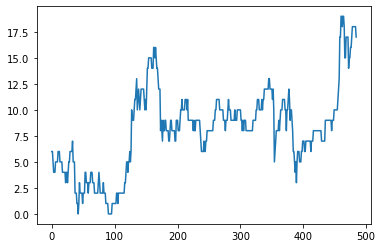

In [113]:
plt.plot(close)

# 数学解

In [121]:
import numpy as np

class HMM:
    def __init__(self, Ann, Bnm, Pi, O):
        self.A = np.array(Ann, np.float)
        self.B = np.array(Bnm, np.float)
        self.Pi = np.array(Pi, np.float)
        self.O = np.array(O, np.float)
        self.N = self.A.shape[0]
        self.M = self.B.shape[1]
    
    
    
    def forward(self):
        T = len(self.O)
        alpha = np.zeros((T, self.N), np.float)

        for i in range(self.N):        
            alpha[0,i] = self.Pi[i] * self.B[i, self.O[0]]

        for t in range(T-1):
            for i in range(self.N):
                summation = 0   # for every i 'summation' should reset to '0'
                for j in range(self.N):
                    summation += alpha[t,j] * self.A[j,i]
                alpha[t+1, i] = summation * self.B[i, self.O[t+1]]

        summation = 0.0
        for i in range(self.N):
            summation += alpha[T-1, i]
        Polambda = summation
        return Polambda,alpha
    
    def backward(self):
        T = len(self.O)
        beta = np.zeros((T, self.N), np.float)
        for i in range(self.N):
            beta[T-1, i] = 1.0

        for t in range(T-2,-1,-1):
            for i in range(self.N):
                summation = 0.0     # for every i 'summation' should reset to '0'
                for j in range(self.N):
                    summation += self.A[i,j] * self.B[j, self.O[t+1]] * beta[t+1,j]
                beta[t,i] = summation

        Polambda = 0.0
        for i in range(self.N):
            Polambda += self.Pi[i] * self.B[i, self.O[0]] * beta[0, i]
        return Polambda, beta
    
    def compute_gamma(self,alpha,beta):
        T = len(self.O)
        gamma = np.zeros((T, self.N), np.float)       # the probability of Ot=q
        for t in range(T):
            for i in range(self.N):
                gamma[t, i] = alpha[t,i] * beta[t,i] / sum(
                    alpha[t,j] * beta[t,j] for j in range(self.N) )
        return gamma
    
    def compute_xi(self,alpha,beta):
        T = len(self.O)
        xi = np.zeros((T-1, self.N, self.N), np.float)  # note that: not T
        for t in range(T-1):   # note: not T
            for i in range(self.N):
                for j in range(self.N):
                    numerator = alpha[t,i] * self.A[i,j] * self.B[j,self.O[t+1]] * beta[t+1,j]
                    # the multiply term below should not be replaced by 'nummerator'，
                    # since the 'i,j' in 'numerator' are fixed.
                    # In addition, should not use 'i,j' below, to avoid error and confusion.
                    denominator = sum( sum(     
                        alpha[t,i1] * self.A[i1,j1] * self.B[j1,self.O[t+1]] * beta[t+1,j1] 
                        for j1 in range(self.N) )   # the second sum
                            for i1 in range(self.N) )    # the first sum
                    xi[t,i,j] = numerator / denominator
        return xi

In [122]:
def viterbi(self):
        # given O,lambda .finding I

        T = len(self.O)
        I = np.zeros(T, np.float)

        delta = np.zeros((T, self.N), np.float)
        psi = np.zeros((T, self.N), np.float)

        for i in range(self.N):
            delta[0, i] = self.Pi[i] * self.B[i, self.O[0]]
            psi[0, i] = 0

        for t in range(1, T):
            for i in range(self.N):
                delta[t, i] = self.B[i,self.O[t]] * np.array( [delta[t-1,j] * self.A[j,i]
                    for j in range(self.N)] ).max()
                psi[t,i] = np.array( [delta[t-1,j] * self.A[j,i]
                    for j in range(self.N)] ).argmax()

        P_T = delta[T-1, :].max()
        I[T-1] = delta[T-1, :].argmax()

        for t in range(T-2, -1, -1):
            I[t] = psi[t+1, I[t+1]]

        return I

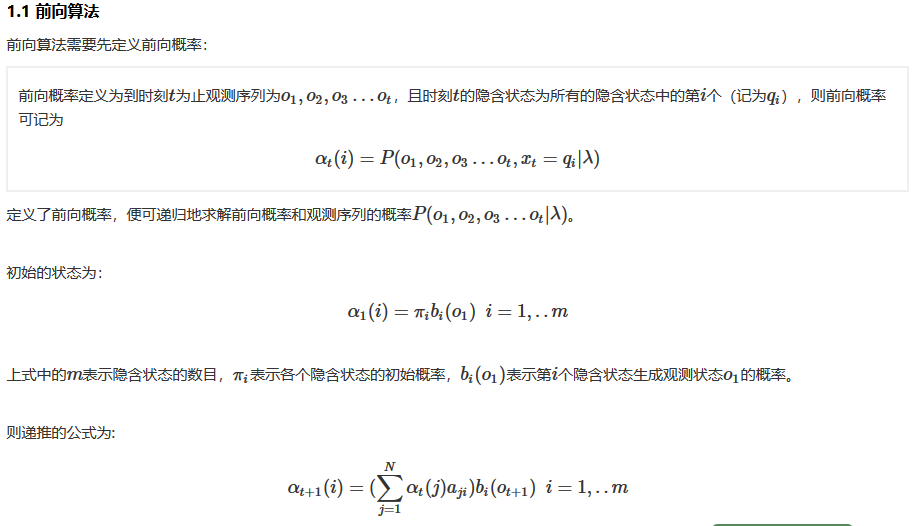

In [123]:
def forward(self):
        T = len(self.O)
        alpha = np.zeros((T, self.N), np.float)

        for i in range(self.N):        
            alpha[0,i] = self.Pi[i] * self.B[i, self.O[0]]

        for t in range(T-1):
            for i in range(self.N):
                summation = 0   # for every i 'summation' should reset to '0'
                for j in range(self.N):
                    summation += alpha[t,j] * self.A[j,i]
                alpha[t+1, i] = summation * self.B[i, self.O[t+1]]

        summation = 0.0
        for i in range(self.N):
            summation += alpha[T-1, i]
        Polambda = summation
        return Polambda,alpha

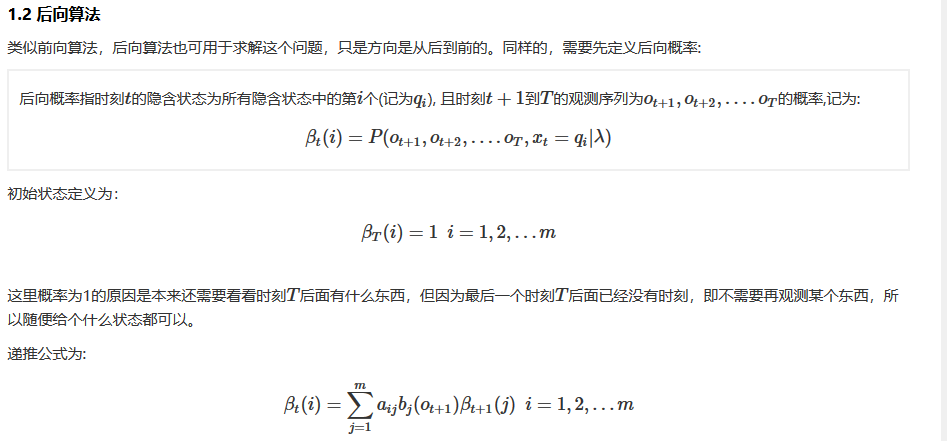

In [124]:
def backward(self):
        T = len(self.O)
        beta = np.zeros((T, self.N), np.float)
        for i in range(self.N):
            beta[T-1, i] = 1.0

        for t in range(T-2,-1,-1):
            for i in range(self.N):
                summation = 0.0     # for every i 'summation' should reset to '0'
                for j in range(self.N):
                    summation += self.A[i,j] * self.B[j, self.O[t+1]] * beta[t+1,j]
                beta[t,i] = summation

        Polambda = 0.0
        for i in range(self.N):
            Polambda += self.Pi[i] * self.B[i, self.O[0]] * beta[0, i]
        return Polambda, beta

In [125]:
def compute_gamma(self,alpha,beta):
        T = len(self.O)
        gamma = np.zeros((T, self.N), np.float)       # the probability of Ot=q
        for t in range(T):
            for i in range(self.N):
                gamma[t, i] = alpha[t,i] * beta[t,i] / sum(
                    alpha[t,j] * beta[t,j] for j in range(self.N) )
        return gamma

In [120]:
def compute_xi(self,alpha,beta):
        T = len(self.O)
        xi = np.zeros((T-1, self.N, self.N), np.float)  # note that: not T
        for t in range(T-1):   # note: not T
            for i in range(self.N):
                for j in range(self.N):
                    numerator = alpha[t,i] * self.A[i,j] * self.B[j,self.O[t+1]] * beta[t+1,j]
                    # the multiply term below should not be replaced by 'nummerator'，
                    # since the 'i,j' in 'numerator' are fixed.
                    # In addition, should not use 'i,j' below, to avoid error and confusion.
                    denominator = sum( sum(     
                        alpha[t,i1] * self.A[i1,j1] * self.B[j1,self.O[t+1]] * beta[t+1,j1] 
                        for j1 in range(self.N) )   # the second sum
                            for i1 in range(self.N) )    # the first sum
                    xi[t,i,j] = numerator / denominator
        return xi

（一） 评估问题

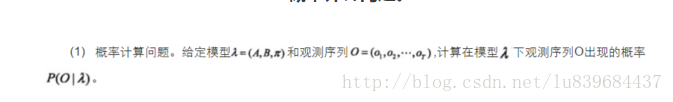

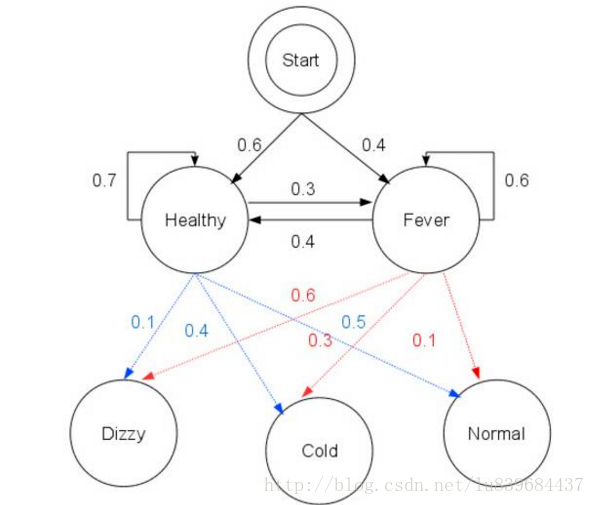

（1）前向算法和后向算法

（2）维特比算法 

$$\beta_t(i) = \sum_{j=1}^ma_{ij}b_j(o_{t+1})\beta_{t+1}(j)~~i=1,2,…m$$

In [126]:
import numpy as np
from hmmlearn import hmm

# 这里假设隐藏层数量为5个    
model = hmm.GaussianHMM(n_components=5, n_iter=1000, tol=0.01,covariance_type="full")

In [137]:
X1 = np.array([[2], [1],[0]])
X2 = np.array([[2], [1],[0],[2]])
X3 = np.array([[2], [1],[1]])
X4 = np.array([[2], [1],[0]])
X5 = np.array([[1], [2],[0]])

X = np.vstack((X1,X2,X3,X4,X5))
print(X)

[[2]
 [1]
 [0]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [0]
 [1]
 [2]
 [0]]


In [138]:
# 这里分别为X1,X2,X3,X4,X5的长度
X_lens = [3,4,3,3,3]
model.fit(X, X_lens)

# 转换矩阵
print(model.transmat_)

Fitting a model with 34 free scalar parameters with only 16 data points will result in a degenerate solution.


[[2.00000000e-001 1.00000000e-001 3.00000000e-001 3.00000000e-001
  1.00000000e-001]
 [8.00000000e-001 4.90994062e-267 1.00000000e-001 1.00000000e-001
  4.90994062e-267]
 [3.59090699e-133 5.00000000e-001 2.80458184e-133 2.80458184e-133
  5.00000000e-001]
 [3.59090699e-133 5.00000000e-001 2.80458184e-133 2.80458184e-133
  5.00000000e-001]
 [8.00000000e-001 4.90994062e-267 1.00000000e-001 1.00000000e-001
  4.90994062e-267]]


C:\Users\asus\Anaconda3\lib\site-packages\hmmlearn\hmm.py:217: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X)


In [131]:
# 正常的序列
test1 = np.array([[2, 1,0,2,1,0]]).T
print(test1)

[[2]
 [1]
 [0]
 [2]
 [1]
 [0]]


In [132]:
# 不正常的序列
test2 = np.array([[2, 1,0,2,1,0,3]]).T
print(test2)

[[2]
 [1]
 [0]
 [2]
 [1]
 [0]
 [3]]


In [134]:
score = model.score(test2)
print(score)

-137.8727309001588
